In [36]:
import math 
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to graphically display the regions.
* Use `scipy.optimize.minimize()`, trying its optional arguments.

In [24]:
def f(parameters):
    x, y = parameters
    return (4-2.1*x**2+x**4/3)*x**2+x*y+(4*y**2-4)*y**2

bounds = [(-2, 2), (-1, 1)]
#Generating a grid of starting points
x_start = np.linspace(-2, 2, 20)
y_start = np.linspace(-1, 1, 20)
starting_points = [np.array([x, y]) for x in x_start for y in y_start]

#Finding minimum for different starting points
minimum = []
for point in starting_points:
    result = scipy.optimize.minimize(f, point, bounds = bounds)
    if result.success:
        minimum.append((result.x, result.fun))

#Printing the list
for count, (location, value) in enumerate(minimum):
    print(f'minimum {count + 1}: Location: {location}, Value: {value}')


# Check the result for the initial guess of (0, 0)
initial_guess_result = scipy.optimize.minimize(f, [0, 0], bounds=bounds)
print("Initial guess (0, 0) leads to: Location", initial_guess_result.x, "Value", initial_guess_result.fun)

#I get that is 400 minumus, should probably make a function for removing duplicates and almost duplicates??

    





minimum 1: Location: [ 0.08984199 -0.71265634], Value: -1.0316284534898486
minimum 2: Location: [-0.08984202  0.7126564 ], Value: -1.0316284534898772
minimum 3: Location: [-0.08984247  0.71265662], Value: -1.0316284534887927
minimum 4: Location: [-0.08984203  0.71265638], Value: -1.0316284534898703
minimum 5: Location: [ 0.08984202 -0.71265641], Value: -1.0316284534898768
minimum 6: Location: [ 0.08984199 -0.71265637], Value: -1.0316284534898676
minimum 7: Location: [ 0.0898423  -0.71265656], Value: -1.031628453489407
minimum 8: Location: [ 0.08984202 -0.71265641], Value: -1.031628453489877
minimum 9: Location: [-0.08984184  0.71265613], Value: -1.0316284534891953
minimum 10: Location: [-0.08984239  0.71265629], Value: -1.0316284534891778
minimum 11: Location: [-0.08984204  0.71265636], Value: -1.0316284534898579
minimum 12: Location: [-0.0898419   0.71265626], Value: -1.0316284534896651
minimum 13: Location: [-0.08984205  0.71265641], Value: -1.0316284534898723
minimum 14: Location: [

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion of a forced pendulum, as a function of the angle $\theta$ with the vertical, is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \frac{g}{l}\sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs by defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \frac{g}{l}\sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $l = 10$, $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a period of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

Text(0, 0.5, 'Omega')

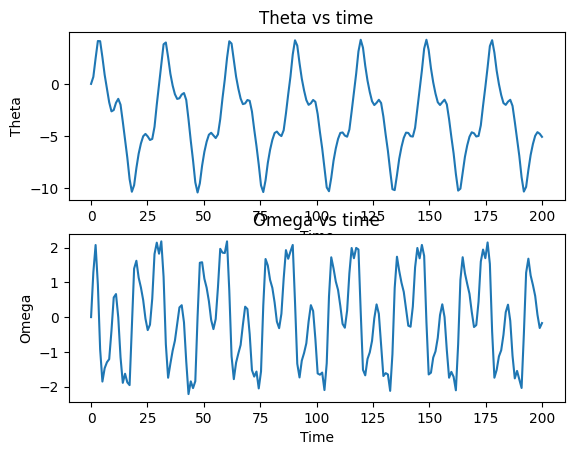

In [32]:
#Defining functions
def derivative(state, t, Q, g, l, d, Omega):
    theta, omega = state
    d_theta = omega
    d_omega = -(1/Q)*omega + g/l * np.sin(theta) + d * np.cos(Omega*t)
    return [d_theta, d_omega]

#Set the constants
theta_zero = omega_zero = 0
state_zero = [theta_zero, omega_zero]
l = 10
Q = 2.0
d = 1.5 
Omega = 0.65
g = 9.81

t = np.linspace(0, 200, 200)

#Solving with odeint
solution = odeint(derivative, state_zero, t, args=(Q, g, l, d, Omega))

#Plotting
theta, omega = solution.T #Umpacking the two returned from odeint
plt.subplot(2, 1, 1)
plt.plot(t, theta)
plt.title('Theta vs time')
plt.xlabel('Time')
plt.ylabel('Theta')

plt.subplot(2, 1, 2)
plt.plot(t, omega)
plt.title('Omega vs time')
plt.xlabel('Time')
plt.ylabel('Omega')

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one downloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

   # year     hare     lynx  carrot
0    1900  30000.0   4000.0   48300
1    1901  47200.0   6100.0   48200
2    1902  70200.0   9800.0   41500
3    1903  77400.0  35200.0   38200
4    1904  36300.0  59400.0   40600
0.047619047619047616
0.047619047619047616
0.047619047619047616
0.047619047619047616
Hare population period: 21.0 years
Lynx population period: 21.0 years


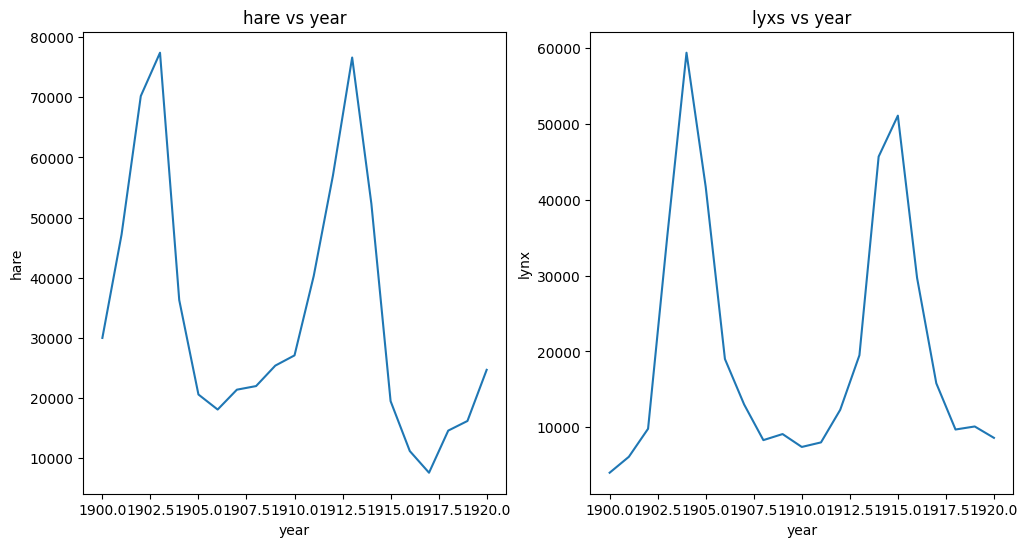

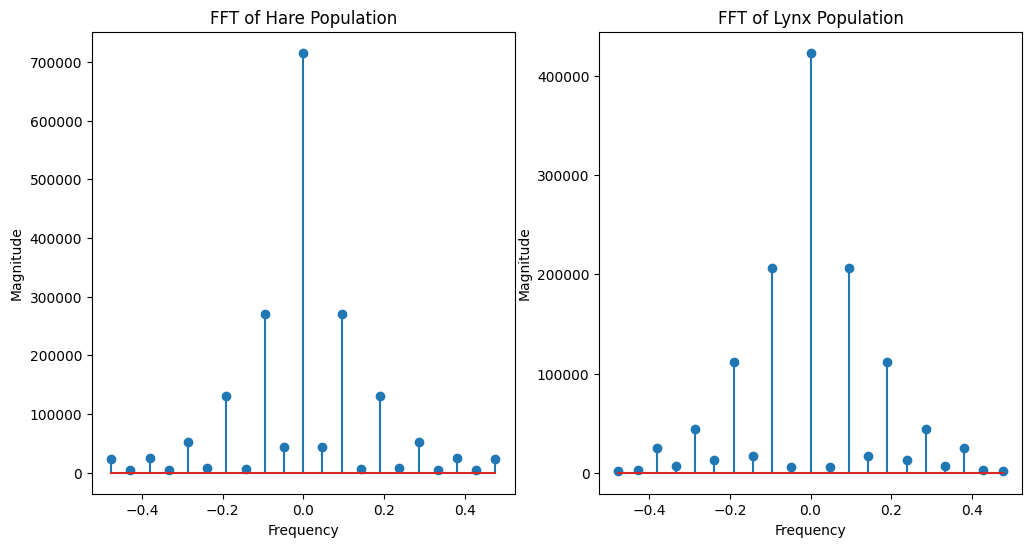

In [70]:
"""import requests

url = 'https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt'
file_name = 'population.txt'

request = requests.get(url)

with open(file_name, 'wb') as file:
    file.write(request.content)
"""
file_name = 'population.txt'
data = pd.read_csv(file_name, sep='\t')
print(data.head())

#Preparing data for FFT
hare = data['hare'].values
lynx = data['lynx'].values
year = data['# year'].values

hare_fft = np.fft.fft(hare)
lynx_fft = np.fft.fft(lynx)

#Abs val, cuz fft is complex
hare_fft_magn = np.abs(hare_fft)
lynx_fft_magn = np.abs(lynx_fft)

# Get frequencies
n = len(year)
timestep = year[1] - year[0]  # Assuming equal spacing
freq = np.fft.fftfreq(n, d=timestep)

hare_peak_freq = freq[np.argmax(hare_fft_magn[1:])] 
lynx_peak_freq = freq[np.argmax(lynx_fft_magn[1:])]

# Calculate period
hare_period = 1 / hare_peak_freq
lynx_period = 1 / lynx_peak_freq

print(hare_peak_freq)
print(lynx_peak_freq)
print(f"Hare population period: {hare_period} years")
print(f"Lynx population period: {lynx_period} years")

#plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(year, hare)
plt.title('hare vs year')
plt.xlabel('year')
plt.ylabel('hare')

plt.subplot(1, 2, 2)
plt.plot(year, lynx)
plt.title('lyxs vs year')
plt.xlabel('year')
plt.ylabel('lynx')

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.stem(freq, hare_fft_magn)
plt.title('FFT of Hare Population')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.subplot(122)
plt.stem(freq, lynx_fft_magn)
plt.title('FFT of Lynx Population')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.show()



4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the 2D regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

In [73]:
from scipy.fftpack import fft2, ifft2, fftshift
from matplotlib.colors import LogNorm

#Import the image
image = plt.imread("moonlanding.png")

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

#Apply 2D FFT
f_transform = fft2(image)
f_shift = fftshift(f_transform)

#Plot the spectrum
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(f_shift), norm=LogNorm(vmin=5), cmap='gray')
plt.title('Fourier Transform')
plt.colorbar()
plt.show()

#Filter the noise
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

# Assuming the noise is at specific frequencies, zero out those regions
f_shift[crow-30:crow+30, ccol-30:ccol+30] = 0

#Apply inverse FFT
f_ishift = fftshift(f_shift)
img_back = ifft2(f_ishift)
img_back = np.abs(img_back)

#Display the result
plt.figure(figsize=(6, 6))
plt.imshow(img_back, cmap='gray')
plt.title('Image after Noise Removal')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'moonlanding.png'